In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
from logd_pka_calculator.models.chemprop import (
    single_task_model_train, 
    single_task_model_predict, 
    multi_task_model_train, 
    multi_task_model_predict
    )
from logd_pka_calculator.visualization.visualize import regression_model

# Using GPU to make training and predictions much faster
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [2]:
# Training model
single_task_model_train()

# Predictions on test set
X_test = pd.read_csv("../data/processed/test_data_chemprop.csv").SMILES.to_list()
y_preds = single_task_model_predict(X_test)

# 33 hours to train on my laptop
# Chemprop is very verbose

Command line
python /Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/ipykernel_launcher.py --f=/Users/jonswain/Library/Jupyter/runtime/kernel-v2-696805rTjNk1m0uJC.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,


Loading training args
Setting molecule featurization parameters to default.
Loading data


/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:7087: RuntimeWarning: overflow encountered in _ncf_cdf
  return _boost._ncf_cdf(x, dfn, dfd, nc)


Validating SMILES
Test size = 19,551


  0%|          | 0/5 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 20%|██        | 1/5 [16:44<1:06:56, 1004.05s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 40%|████      | 2/5 [28:29<41:25, 828.59s/it]   

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 60%|██████    | 3/5 [40:16<25:45, 772.70s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 80%|████████  | 4/5 [56:59<14:23, 863.95s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 5/5 [58:48<00:00, 705.71s/it]

Saving predictions to /dev/null
Elapsed time = 1:25:28


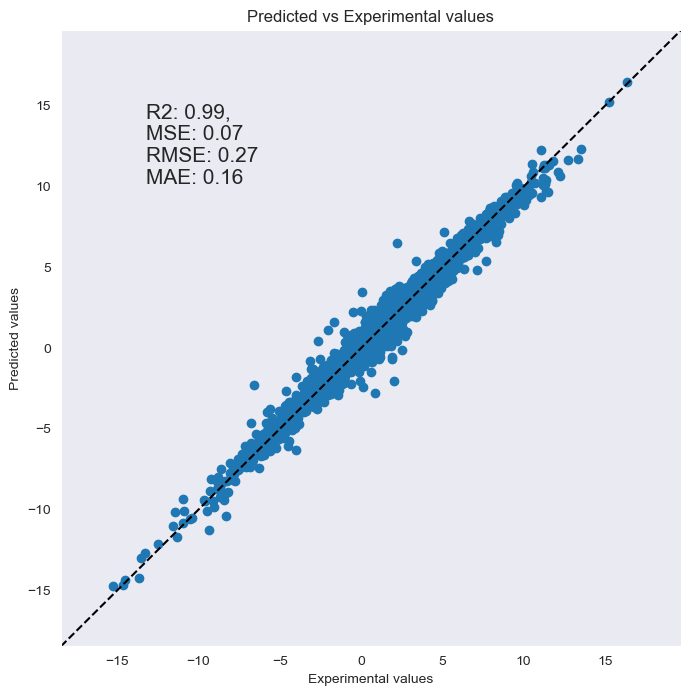

In [4]:
y_true = pd.read_csv("../data/processed/test_data_chemprop.csv").logd
regression_model(np.array(y_true), y_preds[:, 0])

In [5]:
# Training model
multi_task_model_train()

# Predictions on test set
y_preds = multi_task_model_predict(X_test)

# Chemprop is very verbose

Command line
python /Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/ipykernel_launcher.py --f=/Users/jonswain/Library/Jupyter/runtime/kernel-v2-696805rTjNk1m0uJC.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,


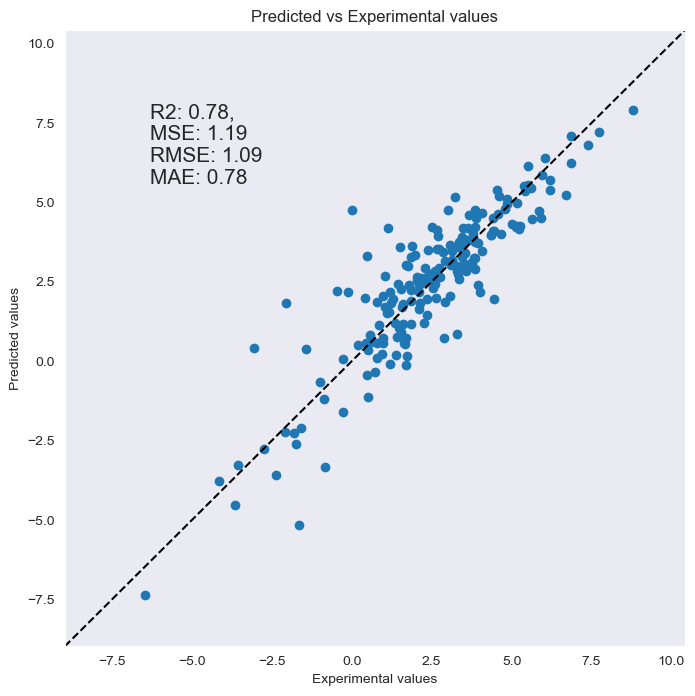

In [ ]:
regression_model(np.array(y_true), y_preds[:, 0])